# **Lab 3: Convolutional Neural Network**

The lab report will be due by **March 22nd, 2023**. 

**Requirement: Please submit the ipynb file of your lab via the link in Brightspace.**

##**Problem 1**
In this problem, we will focus on an hand-written digit recognition task (i.e. multi-class classification task) for MNIST dataset that was introduced in our class. In this project, you are asked to design a convolutional neural network (CNN) with three convolutional layers and three max-pooling layers. 

Requirments: 
*   You need to include the following three components in your lab report: (1) the codes, (2) the obtained training errors, and (3) the obtained testing errors. 

In [ ]:
# imported libraies
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np

11490434/11490434 [==============================] - 0s 0us/step


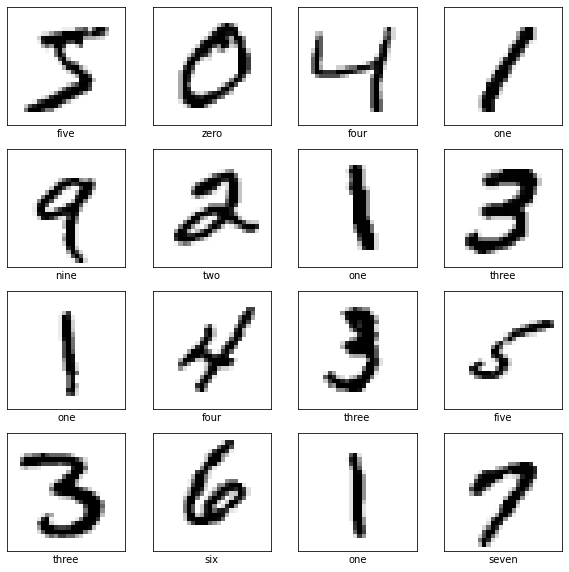

In [ ]:
# Downloaded MNIST dataset and displayed data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
class_names = ['zero', 'one', 'two', 'three', 'four', 'five','six', 'seven', 'eight', 'nine']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Preprocessed the data
train_images = train_images.reshape(60000, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(10000, 28, 28, 1).astype('float32') / 255.0

In [ ]:
# Built CNN
model = models.Sequential()
model.add(layers.Conv2D(25, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(50, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(50, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) #3D to 2D
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10)) #output layer
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 25)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 50)        11300     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 50)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 50)          22550     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 50)        

In [ ]:
# Compiled and trained model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 22s 5ms/step - loss: 0.1655 - accuracy: 0.9488 - val_loss: 0.0457 - val_accuracy: 0.9844
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0520 - accuracy: 0.9843 - val_loss: 0.0325 - val_accuracy: 0.9890
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0367 - accuracy: 0.9887 - val_loss: 0.0321 - val_accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0279 - accuracy: 0.9911 - val_loss: 0.0393 - val_accuracy: 0.9866
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0220 - accuracy: 0.9933 - val_loss: 0.0269 - val_accuracy: 0.9914
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0190 - accuracy: 0.9937 - val_loss: 0.0291 - val_accuracy: 0.9913
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0154 - accuracy: 0.9946 - val_loss: 0.0292 - val_ac

313/313 - 1s - loss: 0.0394 - accuracy: 0.9892 - 780ms/epoch - 2ms/step
0.9891999959945679


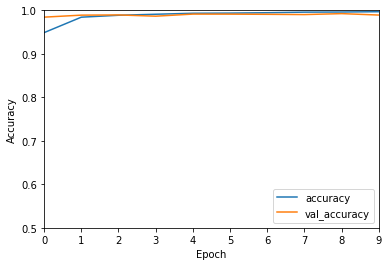

In [ ]:
# Evaluated the CNN Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 9])
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

##**Problem 2**
In this problem, we will focus on an image identification task (i.e. multi-class classification task) for Fashion MNIST dataset. In this project, you are asked to design a fully-connected neural network (FCNN) and a CNN, respectively, for this task. You will have the full freedom to design the structures of your FCNN and CNN.

Requirments: 
*   You need to include the following four components in your lab report: (1) the codes for FCNN and CNN, (2) the obtained training errors by using FCNN and CNN, respectively, (3) the obtained testing errors by using FCNN and CNN, and (4) your observation by comparing the performances of FCNN-based and CNN-based solutions. 

##**Problem 2a (FNCC)**

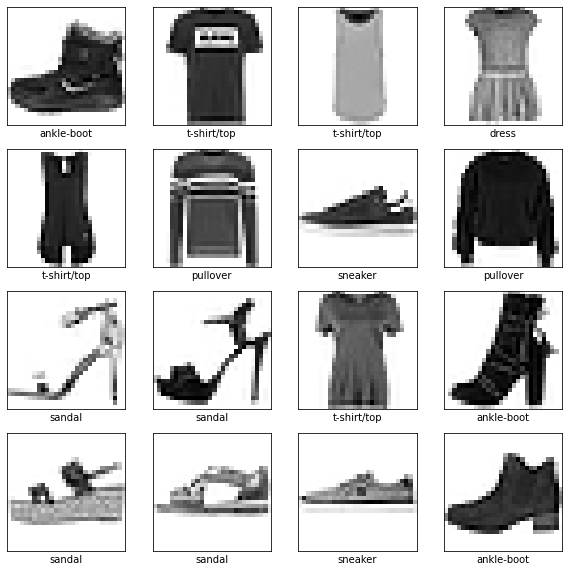

In [ ]:
#Downloaded MNIST fashion dataset for FCNN
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
class_names = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal','shirt', 'sneaker', 'bag', 'ankle-boot']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Preprocessed the data
train_images = train_images.reshape(60000, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(10000, 28, 28, 1).astype('float32') / 255.0

In [ ]:
# Designed the fully-connected neural network with one input layer (size of image)
# Three hidden layers with 128 nodes and one output layer with 10 nodes, all using sigmoid
model = models.Sequential()
model.add(layers.Normalization(input_shape = [28, 28,], axis = None))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(10, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 28, 28)           3         
 ion)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                      

In [ ]:
# Compiled and trained FCNN
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 10s 4ms/step - loss: 0.6502 - accuracy: 0.7645 - val_loss: 0.4576 - val_accuracy: 0.8336
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3962 - accuracy: 0.8576 - val_loss: 0.4234 - val_accuracy: 0.8448
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3544 - accuracy: 0.8707 - val_loss: 0.3890 - val_accuracy: 0.8585
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3300 - accuracy: 0.8795 - val_loss: 0.3643 - val_accuracy: 0.8700
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3135 - accuracy: 0.8848 - val_loss: 0.3730 - val_accuracy: 0.8656
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2964 - accuracy: 0.8915 - val_loss: 0.3398 - val_accuracy: 0.8783
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2853 - accuracy: 0.8945 - val_loss: 0.3455 - val_accuracy: 0.8755
Ep

313/313 - 1s - loss: 0.3465 - accuracy: 0.8778 - 916ms/epoch - 3ms/step
0.8777999877929688


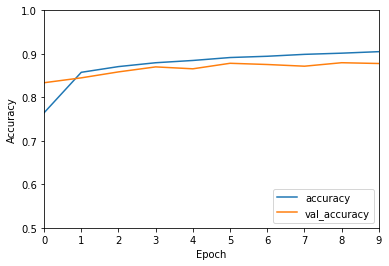

In [ ]:
# Evaluated the fully connected neural network Model
plt.show()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 9])
plt.ylim([.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

##**Problem 2b (CNN)**

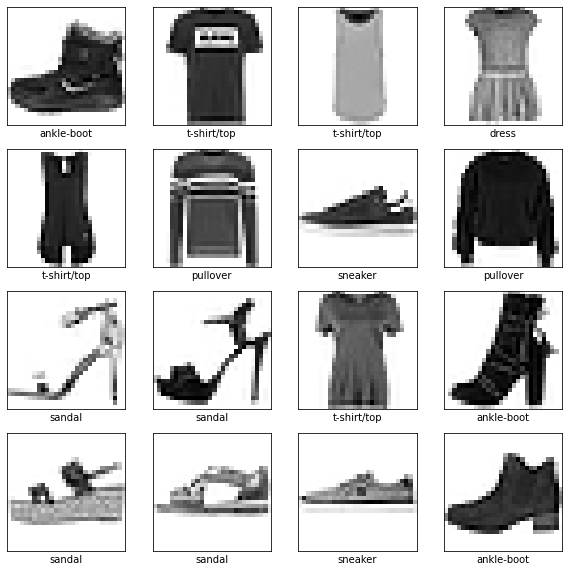

In [ ]:
#Redownloaded MNIST fashion dataset for CNN
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
class_names = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal','shirt', 'sneaker', 'bag', 'ankle-boot']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Preprocessed the data
train_images = train_images.reshape(60000, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(10000, 28, 28, 1).astype('float32') / 255.0

In [ ]:
# Built CNN
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) #3D to 2D
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10)) #output layer
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        73792     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 32)        

In [ ]:
# Compiled and trained CNN
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.5257 - accuracy: 0.8073 - val_loss: 0.3819 - val_accuracy: 0.8582
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3299 - accuracy: 0.8793 - val_loss: 0.3386 - val_accuracy: 0.8757
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2852 - accuracy: 0.8966 - val_loss: 0.3062 - val_accuracy: 0.8889
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2574 - accuracy: 0.9054 - val_loss: 0.2873 - val_accuracy: 0.8934
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2331 - accuracy: 0.9144 - val_loss: 0.2744 - val_accuracy: 0.9038
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2161 - accuracy: 0.9211 - val_loss: 0.2578 - val_accuracy: 0.9070
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2001 - accuracy: 0.9266 - val_loss: 0.2678 - val_ac

313/313 - 1s - loss: 0.2672 - accuracy: 0.9076 - 830ms/epoch - 3ms/step
0.9075999855995178


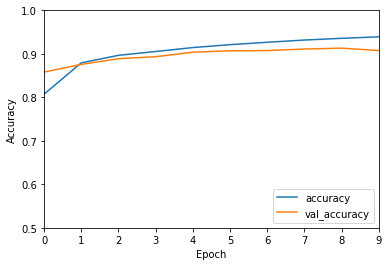

In [ ]:
# Evaluate the CNN Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 9])
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

##**Observations**
The FCNN had training accuracy around 0.8, loss of 0.35, accuracy of 0.88. 
The CNN had training accuracy around 0.9, loss of 0.27, accuracy of 0.9. The CNN had better training accuracy, loss, and accuracy. CNN take shorter time to train and is good for image feature extraction which allows it to thirivbe in this environment. 



##**Problem 3**
In this problem, we will explore the application CNN to realize image identification task (i.e. multi-class classification task) for CIFAR-10 dataset. In this lab, you will have the full freedom to design the structure of your CNN.

Requirments: 
*   You need to include the following three components in your lab report: (1) the codes, (2) the obtained training error, and (3) the obtained testing error. 
(Comment: Since the data is relatively complex, it is fine that you cannot get a high accuracy.)

170498071/170498071 [==============================] - 4s 0us/step


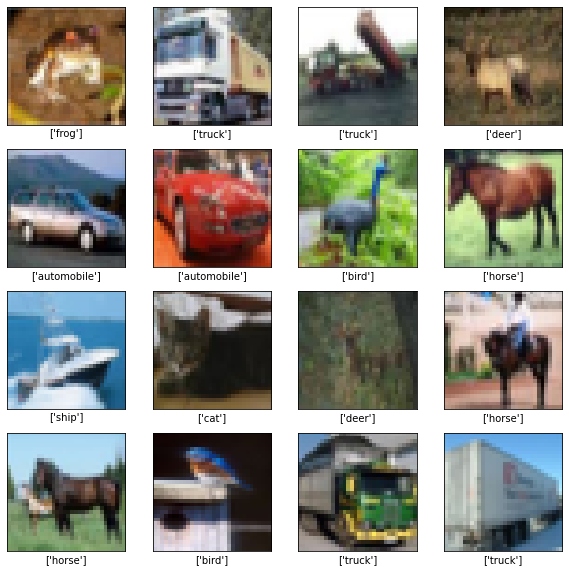

In [ ]:
#Downloaded CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
class_names = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog','frog', 'horse', 'ship', 'truck'])
class_names = class_names.flatten().flatten()

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Preprocessed the data
train_images = train_images.reshape(50000, 32, 32, 3).astype('float32') / 255.0
test_images = test_images.reshape(10000, 32, 32, 3).astype('float32') / 255.0

In [ ]:
# Built CNN
model = models.Sequential()
model.add(layers.Conv2D(100, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(100, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(100, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) #3D to 2D
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10)) #output layer
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 100)       2800      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 100)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 100)       90100     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 100)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 5, 100)         90100     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 100)       

In [ ]:
# Compiled and trained CNN
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 13s 7ms/step - loss: 1.5027 - accuracy: 0.4517 - val_loss: 1.2579 - val_accuracy: 0.5520
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1113 - accuracy: 0.6079 - val_loss: 1.0666 - val_accuracy: 0.6219
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9405 - accuracy: 0.6717 - val_loss: 1.0145 - val_accuracy: 0.6433
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8378 - accuracy: 0.7095 - val_loss: 0.9150 - val_accuracy: 0.6822
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7601 - accuracy: 0.7359 - val_loss: 0.8789 - val_accuracy: 0.7001
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6941 - accuracy: 0.7575 - val_loss: 0.8987 - val_accuracy: 0.6991
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6425 - accuracy: 0.7770 - val_loss: 0.8745 - val_ac

313/313 - 1s - loss: 0.9177 - accuracy: 0.7110 - 987ms/epoch - 3ms/step
0.7110000252723694


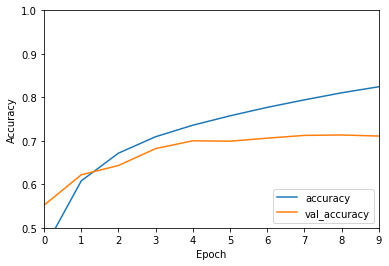

In [ ]:
# Evaluate the CNN Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 9])
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)